MODULE 2 | LESSON 2


---


# **Financial Asset & Return Analysis**

|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** | Basic Python  |
|**Keywords** | Log and simple returns, Variance, Standard Deviation, Correlation, Covariance, Sharpe Ratio, Semivariance |

---


*This lesson will build upon the previous lessons' focus on price to finally expand the conversation to returns. We go much more in depth into how to calculate returns and how to compare two investments using various risk measures. Then, we take that a step further by using distributions to correctly model risk and returns.*

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin

from matplotlib import pyplot as plt
from scipy import stats

## **1. Obtaining and Transforming Financial Data**

### **1.1 Importing Data**
Since this course has a more practical focus, we will start by pulling price data into Python and showing how to simply clean and transform the data so it's in a format that is easier to work with.  

We use the `pandas_datareader` library in order to pull financial data. We will pull data from the FRED (Federal Reserve Economic Data) database. Keep in mind that we can use the `pandas_datareader` package to pull from many different sources, like OECD, Yahoo Finance, etc.

In [2]:
# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get data
df = yfin.download(["^GSPC", "^IXIC", "BTC-USD"], start, end, auto_adjust = False)['Adj Close']

# Display the first five rows
df.head()

[*********************100%***********************]  3 of 3 completed


Ticker,BTC-USD,^GSPC,^IXIC
Date,,,
2019-08-01,10399.668945,2953.560059,8111.120117
2019-08-02,10518.174805,2932.050049,8004.069824
2019-08-03,10821.726562,NaN,NaN
2019-08-04,10970.184570,NaN,NaN
2019-08-05,11805.653320,2844.739990,7726.040039


We've retrieved the data from the two most popular U.S. indices, the NASDAQ and S&P 500, along with the daily Bitcoin prices from the last five years. In this lesson, some basic data cleaning will be done by removing nulls (weekend data). Then, we'll have a DataFrame containing the dates and prices of three different assets. We need to compare returns instead of prices here for a couple of reasons:

1. Return is a scale-free summary of an investment opportunity.
2. Returns have statistical properties that are easier to work with. (This will be discussed more in this lesson.)  

The next question is whether to use simple returns or log returns. Using the following variables, we can define the different types of return:
$p_{_1}$ = final value, $p_{_0}$ = initial value.


**Simple Returns Formula**

$$R_{simple} = \frac{p_{_1} - p_{_0}}{p_{_0}}$$

For example, if we were calculating yearly returns and on day 1, the portfolio was worth \\$100 and at the end of the year it was worth \\$125, the simple return would be (125-100)/100 = 0.25 = 25% gain.


**Log Returns Formula**

$$R_{log} = ln \Big( \frac{p_{_1}}{p_{_0}} \Big)$$

For example, if our portfolio was worth \\$100 at the start of the year and \\$80 by the end of the year, the log return would be ln(80/100) = -0.223 = -22.3% loss.

Log returns are used in this case because it is a common assumption in many financial models that returns are normally distributed, and log returns have good mathematical properties, which make them easier to work with considering this assumption.



### **1.2 Calculate Log Returns, Remove Unused Columns, and Drop Nulls**

We need to remove the nulls for the weekend dates. The following code snippet calculates the log returns for the S&P 500, NASDAQ, and Bitcoin and removes the original price columns.

In [3]:
# Remove rows with missing values
df.dropna(inplace = True)

# Calculate log returns
df["SP500"] = np.log(df["^GSPC"]) - np.log(df["^GSPC"].shift(1))
df["NASDAQ"] = np.log(df["^IXIC"]) - np.log(df["^IXIC"].shift(1))
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"].shift(1))

# Remove original price columns
df.drop(["^GSPC",	"^IXIC", "BTC-USD"], axis = 'columns', inplace = True)

# Remove rows with missing values (again)
df.dropna(inplace = True)

# Display the first five rows
df.head()

Ticker,SP500,NASDAQ,Bitcoin
Date,,,
2019-08-02,-0.007309,-0.013286,0.011331
2019-08-05,-0.030230,-0.035354,0.115474
2019-08-06,0.012933,0.013784,-0.028132
2019-08-07,0.000767,0.003767,0.039612
2019-08-08,0.018588,0.022178,0.002044


### **1.3 Show Summary Stats for the Index Returns**

This code snippet will generate descriptive statistics of your dataframe:

In [4]:
df.describe()

Ticker,SP500,NASDAQ,Bitcoin
count,1257.000000,1257.000000,1257.000000
mean,0.000498,0.000616,0.001453
std,0.013458,0.015952,0.041542
min,-0.127652,-0.131492,-0.464730
25%,-0.005256,-0.006802,-0.016203
50%,0.000866,0.001270,0.000365
75%,0.007240,0.009293,0.020095
max,0.089683,0.089347,0.191527


## **2. Variance and Standard Deviation**

Investors have to keep volatility in mind as well when choosing an investment. For example, a pension fund may need to be extra careful with its money and will want to ensure they aren't getting into any extremely volatile investments. There are also hedge funds, which short stocks and even trade volatility with options. As you can see, whether you're risk-seeking or risk-averse, the volatility (risk) of an investment is something you should care about.   

A simple measure of volatility is the variance. Variance is used to see how far away each data point in a set is away from the mean. Variance is calculated with the following steps:

- Take the difference between each data point and the mean
- Square each difference so that they're all positive values
- Sum up the squared results
- Divide this by the count of data points minus one

$$\sigma^2 = \frac{\sum(x_i - \overline{x})^2}{n-1}$$

where

$\sigma^2$ = sample variance </br>
$x_i$ = value of one observation </br>
$\overline{x}$ = mean of all observations </br>
$n$ = number of observations </br>

The larger the variance, the further spread out it is from the mean. Variance treats all deviations from the mean the same way, regardless of whether they are less than or greater than the mean. A variance of zero would indicate that each data point is the same.  

Standard deviation is easy to calculate once you have the variance. All you have to do is take the square root of the variance:

$$\sigma = \sqrt{\sigma^2}$$

where
$\sigma$ = standard deviation

Standard deviation is another commonly used statistical measure to quantify market volatility. You would expect newer growth stocks to have higher standard deviations and more established blue-chip stocks to have lower standard deviations of returns. We will illustrate this by comparing daily returns from the last five years of the S&P 500 and NASDAQ, as well as Bitcoin prices. While Bitcoin isn't necessarily a growth stock, it's still very new compared to the S&P 500 and NASDAQ, so you would expect to see bigger swings in the price when compared to those two stock indices.

This is illustrated below by taking the standard deviations of returns over the last five years. These results are as expected: both the S&P 500 and NASDAQ have very similar daily standard deviations. Bitcoin, on the other hand, has almost five times the standard deviation of the two stock indices.

In [5]:
df.std()

Ticker
SP500      0.013458
NASDAQ     0.015952
Bitcoin    0.041542
dtype: float64

We can also visualize this by graphing returns in Python using the plot method in pandas in conjunction with standardized y-axis limits so that we can ensure we're comparing returns on the same scale:

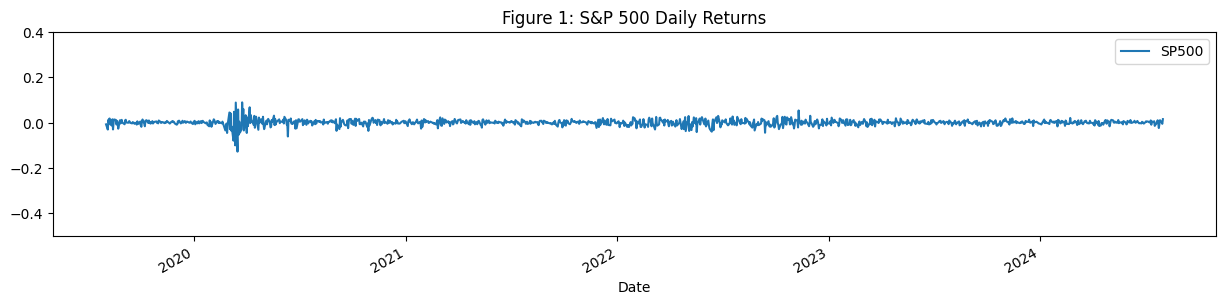

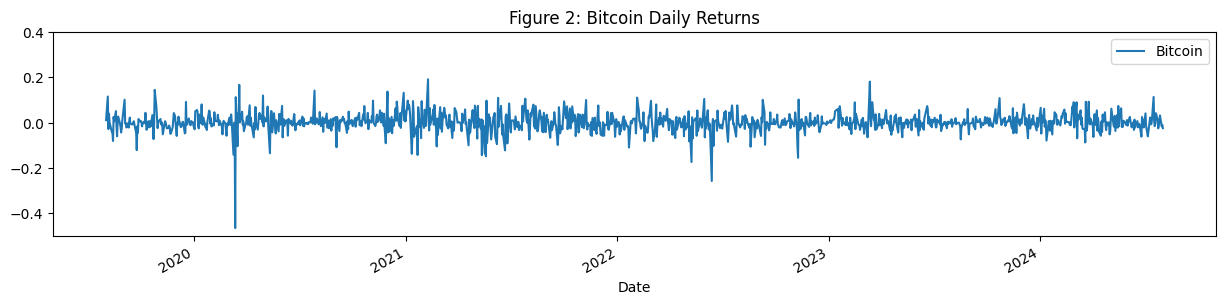

In [6]:
# Generate two plots
ax1 = df.plot(figsize=(15, 3), y="SP500", title="Figure 1: S&P 500 Daily Returns")
ax2 = df.plot(figsize=(15, 3), y="Bitcoin", title="Figure 2: Bitcoin Daily Returns")

# Set y-axis limits for both plots
ax1.set_ylim(-0.5, 0.4)
ax2.set_ylim(-0.5, 0.4);

The above charts show clearly how much more volatile Bitcoin is compared to the S&P 500 and hence why the variance/standard deviation of returns is much higher.

Standard deviation is preferred over variance in most cases because variance is a squared result of the units of return. By taking the square root of this and thus obtaining standard deviation, the result is in the same unit as the underlying data, which in this case is returns. This intuitively makes it much easier to understand.  

Keep in mind that a lower standard deviation is not necessarily preferable when considering investments. It all depends on the investor's risk preferences. A higher risk means a higher potential for rewards. Understanding the investor's perspective is key to determining what levels of risk an investor is comfortable with.  

## **3. Covariance and Correlation**

We are able to compare the performance of stocks that have different price levels by using returns and standard deviation. How can we look at the joint performance of two stocks? For this, we turn to covariance and correlation. We will start with covariance:

$$\frac{\sum(x_{i}-\overline{x})(y_{i}-\overline{y})}{N-1}$$

where

$x_i$ = value of one observation of $x$  </br>
$y_i$ = value of one observation of $y$ </br>
$\overline{x}$ = mean of $x$ </br>
$\overline{y}$ = mean of $y$ </br>
$N$ = number of observations </br>


**Covariance** provides us some insight into how two variables move together. A positive covariance between stock returns would indicate that when one stock goes up, so does the other and vice versa. A negative covariance would mean that the two stocks move inversely, i.e., when one goes up, the other goes down.  

Looking at the covariance matrix below for our three assets, we can see that these assets have a positive relationship with each other. It's hard to understand much more than that with these numbers, given that the units are not standardized.



### **3.1 Using a Covariance Matrix**

While covariance is useful for determining the direction of two variables jointly, we can turn to correlation for a more standardized version of this. For now, when discussing correlation, we will use the Pearson's correlation coefficient. The other types of correlation will be discussed in a future lesson.

In [7]:
df.cov()

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,0.000181,0.000203,0.000200
NASDAQ,0.000203,0.000254,0.000253
Bitcoin,0.000200,0.000253,0.001726


Here's how to interpret it:

 - Diagonal values: These represent the variance of each asset. For example, 0.000149 is the variance of the S&P 500 daily log returns.
 - Off-diagonal values: These represent the covariance between two different assets. For example, 0.000160 is the covariance between the daily log returns of the S&P 500 and NASDAQ.

All the values are positive, indicating a positive relationship between the returns of these assets. This means that when the return of one asset is positive, the return of the other assets tends to be positive as well.


### **3.2 Using the Pearson Correlation Coefficient Formula**

The Pearson correlation coefficient is a measure of the strength of a linear relationship between two variables. The formula is as follows:

$$\rho_{_{X,Y}} = \frac{cov(X,Y)}{\sigma_{_{X}} \sigma_{_{Y}}}$$

where

$cov$ = Covariance </br>
$\sigma_{_{X}}$ = Standard Deviation of $X$ </br>
$\sigma_{_{Y}}$ = Standard Deviation of $Y$ </br>

Correlation is used in statistics to quantify the degree to which two variables move in a linear relation to each other. Correlation can range from –1 to 1 inclusive. A correlation of 1 means perfect correlation; the variables move exactly in tandem with one another. Perfect tandem for positive correlation means that if we know variable X increases, then variable Y also increases. A correlation of -1 indicates perfect inverse correlation. This is also perfect tandem, but in the opposite direction. Here, if we know variable X increases, then variable Y decreases. A correlation of 0 indicates there is no linear distinguishable relationship between two variables; therefore, it would be impossible to make predictions of one variable given the other. In this case, if we know variable X increases, then variable Y is equally likely to increase or decrease.

A benefit of correlation over covariance is that correlation is capped from -1 to 1 while covariance can be from -inf to inf. This makes covariance a harder statistic to understand intuitively. Correlation is also proportional, which will be shown in the video below.  

Keep in mind that a lot of models and financial concepts assume a constant correlation, but this is rarely the case. Correlation changes over time and will likely even change if you adjust the time range from which you're measuring correlation.

When comparing the correlations of the assets we've been using so far, you can see it paints a clearer picture than the covariance did.

In [8]:
round(df.corr(), 3)

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,1.000,0.947,0.358
NASDAQ,0.947,1.000,0.381
Bitcoin,0.358,0.381,1.000


All of the variables have a positive relationship, which we saw with the covariance matrix previously. Here, we can also see the strength of the relationships: the S&P 500 is strongly correlated with NASDAQ since we've obtained a 0.943 Pearson's correlation coefficient. The relationship between NASDAQ and Bitcoin is still positive but much weaker with a 0.205 Pearson's correlation coefficient.

When we chart the returns between these variables, we can see evidence of the correlations above, visually:

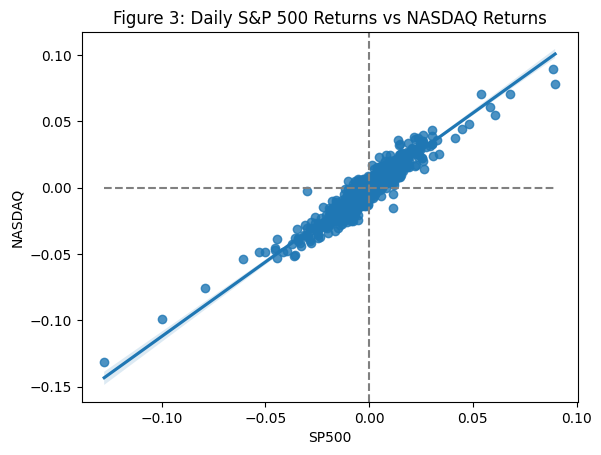

In [9]:
# Create scatter plot with regression line
chart = sns.regplot(x="SP500", y="NASDAQ", data=df).set(
    title="Figure 3: Daily S&P 500 Returns vs NASDAQ Returns"
)

# Add vertical line at x=0 and horizontal line at y=0
plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey");

This plot visually shows the relationship between the daily log returns of the S&P 500 and NASDAQ, including a regression line that represents the best-fit linear relationship between the two variables. The dashed lines at x=0 and y=0 help to visualize the positive and negative returns for each asset. This relationship shows nearly perfect correlation.

Now let's visualize relationship between S&P 500 and Bitcoin daily returns.

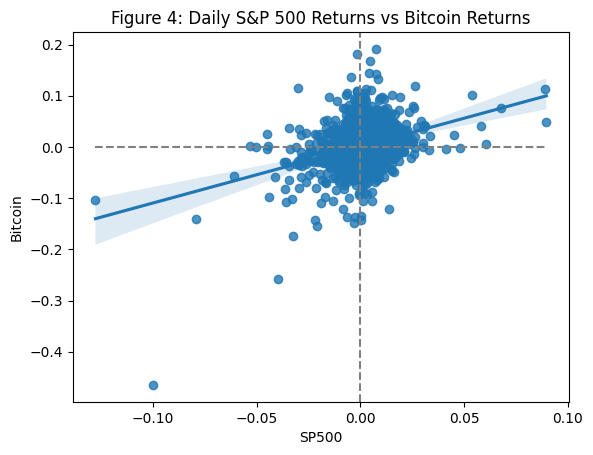

In [10]:
# Create scatter plot with regression line
sns.regplot(x="SP500", y="Bitcoin", data=df).set(
    title="Figure 4: Daily S&P 500 Returns vs Bitcoin Returns"
)

# Add vertical line at x=0 and horizontal line at y=0
plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey");

The relationship here is much more scattered even though the relationship is still slightly positive. These were charted using the seaborn `regplot()` method, which also shows confidence intervals around the regression line, as seen above.  

### **3.3 The Sharpe Ratio**

Are there any statistics we can use to quantify not just return but also risk? For this, we turn to the Sharpe ratio.

The Sharpe ratio allows an investor to understand the relationship between the return of an investment and its volatility. The formula is as follows:

$$\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}$$

where

$R_p$ = Return of the portfolio </br>
$R_f$ = Risk-free rate </br>
$\sigma_p$ = Standard deviation of the portfolio </br>


In many cases with interest rates so low, investors will assume the risk-free rate to be 0, making the ratio:

$$\text{Sharpe Ratio} = \frac{R_p}{\sigma_p}$$

Notice anything about the denominator? Yes, that's right: we use the standard deviation here to represent risk.  

This measure is used as a way of scaling the return of an investment depending on how much risk is taken. In other words, the higher the standard deviation, the more the risk-weighted return is reduced. Let's use the same example as above with S&P 500 and Bitcoin daily returns over the last five years.


In [11]:
# Calculates the Sharpe Ratios for both the S&P 500 and Bitcoin
Sharpe_Ratio_SP500 = df["SP500"].mean() / df["SP500"].std()
Sharpe_Ratio_Bitcoin = df["Bitcoin"].mean() / df["Bitcoin"].std()

# Print the results
print("Sharpe Ratio of S&P 500: ", round(Sharpe_Ratio_SP500, 5))
print("Sharpe Ratio of Bitcoin: ", round(Sharpe_Ratio_Bitcoin, 5))


Sharpe Ratio of S&P 500:  0.03699
Sharpe Ratio of Bitcoin:  0.03498


Based on these results, the S&P 500 has a slightly higher Sharpe Ratio (0.03699) compared to Bitcoin (0.03498). This suggests that the S&P 500 has provided a slightly better risk-adjusted return over the analyzed period.

One major flaw with the Sharpe ratio is that it uses the standard deviation of returns in the denominator, which assumes that returns are normally distributed. This may not always--and is actually rarely--the case. This will be explored further in a future lesson.  

## **4. Semivariance**

How can we refine the Sharpe ratio to give an even better measure of risk-adjusted returns? Semivariance is the answer. Semivariance, also known as downside risk, is a more refined version of a standard deviation. Standard deviation looks at both the upside and downside risk of an investment. Most investors, unless you're trading short, care much more about the downside risk than the upside risk. In other words, if you bought a stock and are looking at the Sharpe ratio, you wouldn't want this number to be penalized for how far it moves to the upside. Most of the time, an investor will be much more concerned with the downside risk of a stock.  

$$\text{Semivariance} = \frac{1}{n} \sum_{r_i < \overline{r}}^{n} (r_i - \overline{r})^2$$

where

$r_i$ = value of one observation  </br>
$\overline{r}$ = mean of all observations  </br>
$n$ = number of observations

Semivariance can be thought of as an estimator of variance of the returns that are less than their average. This can be used to estimate the average loss a portfolio could incur, assuming normal distributions of returns.  

Conversely, if we are short a security, we could still use semivariance, but this time, it would focus on the returns that are positive. If we are short, drops in the price create upside, so we would not want to penalize this volatility in our Sharpe ratio. However, if there are large deviations in the upward direction, then this will contribute to semivariance. In short, semivariance uses either the positive or negative returns.

Now let's compute semivariance for both the S&P 500 and Bitcoin:


In [12]:
# Calculate the mean return for each
sp500mean = df["SP500"].mean()
BTCmean = df["Bitcoin"].mean()

# Calculate semivariance for each
sp500_semivariance = ((df[df["SP500"] < sp500mean]["SP500"] - sp500mean) ** 2).mean()
BTC_semivariance = ((df[df["Bitcoin"] < BTCmean]["Bitcoin"] - BTCmean) ** 2).mean()

# Print the semivariance results
print("Semivariance of S&P 500: ", round(sp500_semivariance, 5))
print("Semivariance of Bitcoin: ", round(BTC_semivariance, 5))


Semivariance of S&P 500:  0.00021
Semivariance of Bitcoin:  0.00181


This output shows that Bitcoin has a much higher semivariance (0.00181) compared to the S&P 500 (0.00021). This indicates that Bitcoin has experienced significantly larger negative deviations from its average return, suggesting higher downside risk.

## **5. How Are Stock Returns Distributed?**

Many models and theories surrounding stocks assume a normal distribution. We will try to determine that here with a data-based analysis. Properties of a Gaussian distribution are as follows:

* Mean, median, and mode are all the same.
* The data is symmetrical, meaning there are equal counts of observations on both sides of the mean.
* In normally distributed data, 68.25% of all cases fall within +/- one standard deviation from the mean, 95% of all cases fall within +/- two standard deviations from the mean, and 99.7% of all cases fall within +/- three standard deviations from the mean.

Let's start by pulling 20 years of daily price data for the S&P 500. We'll use similar methods we've used in the last few lessons to pull this data and will calculate the log returns here.

One quick way of doing this is to determine how many data points we have on either side of the mean here. We have a bit more than 5,000 data points. The below code takes the count of data points greater than the mean and divides it by the total number of data points. This will give us the percentage of data points greater than the mean.

In [13]:
# Starting and end dates
start = datetime.date(2004, 8, 1)
end = datetime.date(2024, 8, 1)

# Get the data
prices = pd.DataFrame(yfin.download(["^GSPC"], start, end, auto_adjust = False)["Adj Close"])

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500"})
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]

[*********************100%***********************]  1 of 1 completed


### **5.1 Are Returns Symmetric?**

One quick way of doing this is to determine how many data points we have on either side of the mean here. We have a bit more than 5,000 data points here. The below code takes the count of data points greater than the mean and divides it by the total number of data points. This will give us the percentage of data points greater than the mean.

In [14]:
(len(df[df.SP500 > df.SP500.mean()])) / (len(df))

0.5235446056030201

The output will be a number between 0 and 1, representing the proportion of S&P 500 daily returns that are greater than the mean return. This can give you an idea of the skewness of the return distribution. A value close to 0.5 suggests a roughly symmetrical distribution, while a value significantly greater than 0.5 suggests a negative skew (more returns below the mean).

We're getting about 52.6% of data points being greater than the mean, which shows we have a slightly negative skew to this dataset. We can't rule out symmetric returns based on this since it is only a sample of data and is reasonably close to the 50% mark. This makes it hard to say for certain whether S&P 500 returns are symmetric or not, but it is still a reasonable assumption to make here.

### **5.2 Is Volatility Constant?**

The following code calculates and plots the rolling 50-day standard deviation of the S&P 500 log returns, providing a visualization of the volatility over time.

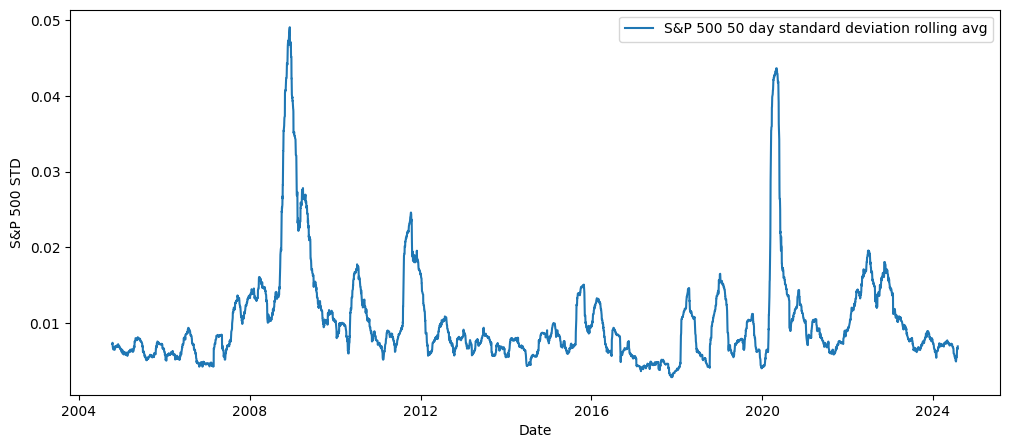

In [15]:
# Calculate rolling standard deviation
vols = pd.DataFrame(df.SP500.rolling(50).std()).rename(columns={"SP500": "S&P 500 STD"})

# set figure size and plot rolling standard deviations
plt.figure(figsize=(12, 5))
sns.lineplot(
    x="Date",
    y="S&P 500 STD",
    data=vols,
    label="S&P 500 50 day standard deviation rolling avg",
)
plt.show()

From the above plot, it can be clearly seen that volatility is anything but constant. This adds another layer of complexity to modeling stock returns, especially in the many models which assume constant volatility.

## **6. Are Stock Returns Normally Distributed?**

The normal distribution is one of the most common distributions used in modeling random variables. Indeed, many phenomena in the natural and social sciences can be modeled by normal distribution. One of the great advantages of the normal distribution is its simplicity. We can completely describe a normal distribution through two numbers: one for the center of the distribution and one for the uncertainty about that center. The first number refers to the mean, and the second number refers to the standard deviation.

Once we have these two numbers, we can draw inferences, estimate percentiles, compute probabilities that a point falls within a region, and more. If our data is well represented by the normal distribution, then we can confidently use the mean and standard deviation to report our portfolio expected returns and volatilities. If our data is not well represented by the normal distribution, then we need to find other distributions that are more suitable. Thus, when we have a distribution of stock returns, for example, we'll want to start this assessment by visualizing the returns to see if they appear to be normal. Of course, we can follow this up with more quantitative assessments by running statistical tests.

We can visualize the data using the `hist()` method. We pass in `bins = 100` as a parameter to determine the amount of buckets to place the data in. The more bins you have, the more granular the data will look in a histogram. Increasing the bins too much may result in slightly noisy data, which will make it tougher to determine a normal distribution.

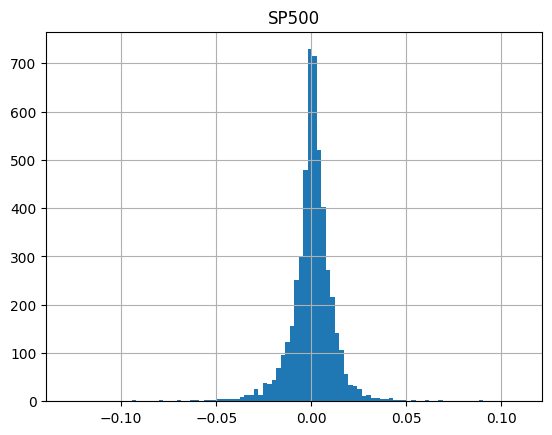

In [16]:
df.hist(bins=100);

The chart above looks like it could be normally distributed, but we need to be a little more scientific to determine if that's actually the case or not.

### **6.1 Conducting a Normality Test**

We can use the `normaltest()` method to determine if the sample data could fit a normal distribution. This method uses D'Agostino and Pearson's normality test, which combines skew and kurtosis to produce an omnibus test of normality.

In [17]:
stats.normaltest((np.array(df.SP500)))

NormaltestResult(statistic=1234.7310969195069, pvalue=7.61288004534643e-269)

The output of this code includes two values:

 - Statistic: A test statistic that measures the deviation from normality. Higher values indicate a greater deviation.
 - p-value: The probability of observing the data if it were truly normally distributed. A small p-value (typically less than 0.05) suggests that the data is not normally distributed.

The output above shows the results of the D'Agostino and Pearson normality test on our S&P 500 log return data. The statistic of 1234.73 is very high, indicating a substantial deviation from a normal distribution. The extremely small p-value (7.61e-269) provides strong evidence to reject the null hypothesis that the data is normally distributed. In simpler terms, this test strongly suggests that the S&P 500 daily log returns in our dataset do not follow a normal distribution.

### **6.2 Testing Skewness and Kurtosis**

As one added testing step, we can test the skewness and kurtosis of our distribution using the Jarque-Bera test. The test statistic will always be greater than zero. The further the test statistic is from zero, the more likely the sample data does not match a normal distribution.

Lucky for us, Python has another library for us to use here, which really simplifies the analysis. From the `scipy.stats` library, we can apply the `jarque_bera()` method directly to our data to get the test statistic.


In [18]:
stats.jarque_bera((np.array(df.SP500))).pvalue

0.0

A small p-value (typically less than 0.05) indicates that the data is likely not normally distributed. This output indicates that the p-value from the Jarque-Bera test is 0.0 (or extremely close to zero). This strongly suggests that the S&P 500 daily log returns in your dataset are not normally distributed.

### **6.3 Where Does Our Gaussian Distribution Break Down?**

According to the normality test, our data is not normally distributed despite the histogram looking like it may be. So why does the data fail the normality test? The answer likely comes down to fat tails. Fat tails essentially mean that extreme events (+/-3 standard deviations away from the mean) are more likely than the normal distribution would imply.

To determine how many standard deviations away from the mean a specific number is, we need to use

$$\frac{X - \bar{X}}{\text{Sample standard deviation}}$$

Let's do this for the min and max of the sample data:

In [19]:
# minimum and maximum daily log returns
dfMax = df.SP500.max()
dfMin = df.SP500.min()

# Print maximum and minimum daily log returns
print("Maximum return of sample data is: ", round(dfMax, 5))
print("Minimum return of sample data is: ", round(dfMin, 5))
print(' - - - - - - - - - -')

# Calculates the number of standard deviations from the mean return
num_dev_max = (df.SP500.max() - df.SP500.mean()) / df.SP500.std()
num_dev_min = (df.SP500.min() - df.SP500.mean()) / df.SP500.std()

# Print num_dev_max and num_dev_min
print("Number of standard deviations from the mean for the maximum return: ", round(num_dev_max, 5))
print("Number of standard deviations from the mean for the minimum return: ", round(num_dev_min, 5))


Maximum return of sample data is:  0.10957
Minimum return of sample data is:  -0.12765
 - - - - - - - - - -
Number of standard deviations from the mean for the maximum return:  9.0497
Number of standard deviations from the mean for the minimum return:  -10.60025


This output provides valuable insights into the distribution of S&P 500 daily log returns, particularly highlighting the presence of outliers or fat tails:

 - Maximum and Minimum Returns: The maximum daily return of approximately 10.957% and the minimum daily return of approximately -12.765% show the range of returns observed in our data.
 - Z-scores: The z-scores for the maximum and minimum returns are 9.05 and -10.6, respectively. These are extremely high z-scores, indicating that both the maximum and minimum returns are significant outliers, far away from the mean in terms of standard deviations.

In a normal distribution, you would rarely observe data points more than 3 standard deviations away from the mean. These high z-scores suggest that the S&P 500 daily returns have fatter tails than a normal distribution, meaning extreme events (large positive or negative returns) are more likely than would be expected under normality.

This information is crucial for risk management and modeling, as relying on the assumption of normality can lead to underestimating the probability of extreme events and potential losses.

These standard deviations are humongous when compared to the normal distribution. We can see this analytically when we plug in the z score to the `norm.cdf()` method to determine the probability this value could be in a normal distribution:

In [20]:
stats.norm.cdf(-10.60)

1.4899011272964664e-26

This implies that the chance we could have a move as small as -12.77% is 1.49e-26. This probability is so low that we would never expect an event like this to happen in our lifetime. We have multiple events like this, as illustrated by the minimum and maximum.

Going further with this idea, based on normal distribution z tables, we would expect 99.7% of our data points to be within +/- 3 standard deviations from the mean. Let's determine this for our sample data. First off, we need to find the cut-off values at +/- 3 standard deviations:

In [21]:
# Calculates the upper and lowers bounds
upper = (3 * df.SP500.std()) + df.SP500.mean()
lower = (-3 * df.SP500.std()) + df.SP500.mean()

# Print the results
print("Upper bound: ", round(upper, 5))
print("Lower bound: ", round(lower, 5))


Upper bound:  0.03654
Lower bound:  -0.0359


The above two calculations would imply that 99.7% of all of our data points should be in between -0.0359 and 0.03654.

Since we have 5,031 data points, we would expect about 15 (i.e., 3% of 5,031) of them to be outside of that range if normality was held. Now let's see how many we actually have. Let's filter the `df` DataFrame to select rows where the S&P 500 daily log returns are outside the range of upper bound and lower bound. Then, we'll count the number of the data points that fall in this range:

In [22]:
# Calculates the number of data points
len(df[(df["SP500"] < lower) | (df["SP500"] > upper)])


84

That's a significant number of outliers considering that in a normal distribution, you would expect only about 0.3% of the data points to fall outside the range defined by 3 standard deviations from the mean.

This finding further supports the conclusion from the normality tests that the S&P 500 daily log returns are not normally distributed and exhibit fat tails. The presence of these outliers highlights the importance of considering alternative distributions and risk measures when modeling and analyzing financial data.

## **7. Non-Gaussian Distributions**

One potential alternative distribution we could use to forecast stock returns is the Student's t-distribution. This is very similar to a normal distribution except it has heavier tails. Theoretically, this sounds perfect for daily returns based on what we've seen up to this point.

Let's proceed with a visual inspection of the distribution of our data by superimposing the normal distribution on the kernel density estimation (KDE) of S&P 500 returns:

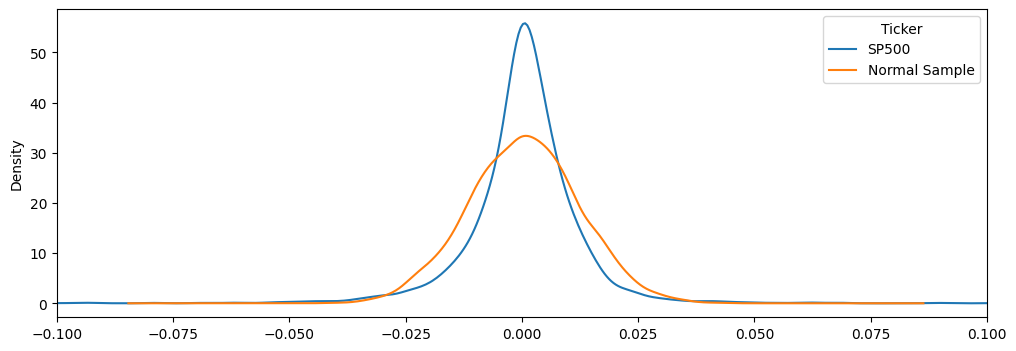

In [23]:
# Sampling from normal distribution
np.random.seed(222)
normal_dist = stats.norm.rvs(size=len(df["SP500"]), loc = df["SP500"].mean(), scale = df["SP500"].std())

# Creating an additional column in df in order to use the KDE plot functionality of pandas
df['Normal Sample'] = normal_dist

# Plotting the KDE plots
df[['SP500', 'Normal Sample']].plot(kind = 'kde', xlim = (-0.1, 0.1), figsize = (12,4));


The S&P 500 returns seem a lot more leptokurtic. A leptokurtic distribution has fatter tails and a sharper peak than a normal distribution. By definition, leptokurtic distributions have kurtosis greater than 3.


In [24]:
df.SP500.kurt()

13.180839169084916

Indeed, the kurtosis of the S&P 500 is significantly greater than 3, confirming that the distribution of S&P 500 daily log returns is highly leptokurtic.

Now, let's check if the tails of the S&P 500 are also fatter than those of a normal distribution. The following code creates a kernel density estimation (KDE) plot to compare the tails of the actual S&P 500 daily log returns with the tails of the generated normal sample. It focuses on the left tail (negative returns) by setting the x-axis limits to (-0.075, -0.04).

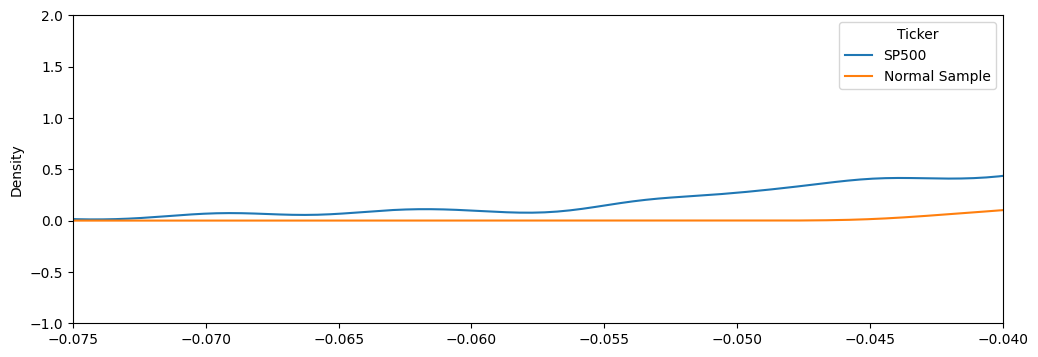

In [25]:
# Observing the tails
df[['SP500', 'Normal Sample']].plot(kind = 'kde', xlim = (-0.075, -0.04), ylim = (-1, 2), figsize = (12,4));

The resulting plot visually shows the differences in the tails of the two distributions. We observe that the actual S&P 500 returns have a fatter left tail than the normal distribution, indicating a higher probability of large negative returns. This visualization provides further evidence of the non-normality of the S&P 500 returns and the presence of fat tails.

At this stage, we will calibrate the parameters of the Student's t-distribution using Maximum Likelihood Estimation (MLE) to align the distribution closely with our observed data. The following code fits a Student's t-distribution to the S&P 500 daily log returns using [Maximum Likelihood Estimation (MLE)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fit.html) and then creates a KDE plot to compare the fitted t-distribution with the actual data.



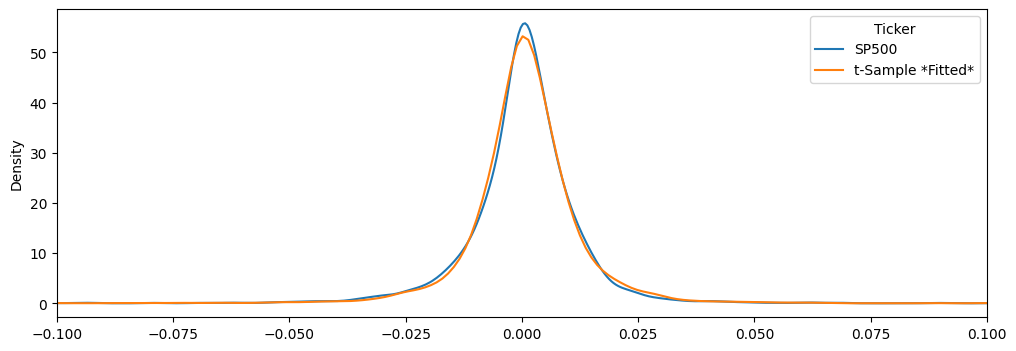

In [26]:
# Fit the t-distribution using MLE
params = stats.t.fit(df.SP500)

# We plot the fitted distribution against the kde of the data
df['t-Sample *Fitted*'] = stats.t.rvs(*params, size = len(df))
df[['SP500', 't-Sample *Fitted*']].plot(kind = 'kde', figsize = (12,4), xlim = (-0.1, 0.1));

From the visual inspection, it's evident that the synthetic data generated from the fitted Student's t-distribution offers a more accurate approximation of our actual data compared to what we get from a normal distribution.

Let's check the tails once more. We will again zoom in to observe proximity between the left tail of the actual S&P 500 daily log returns with the left tail of the fitted Student's t-distribution:

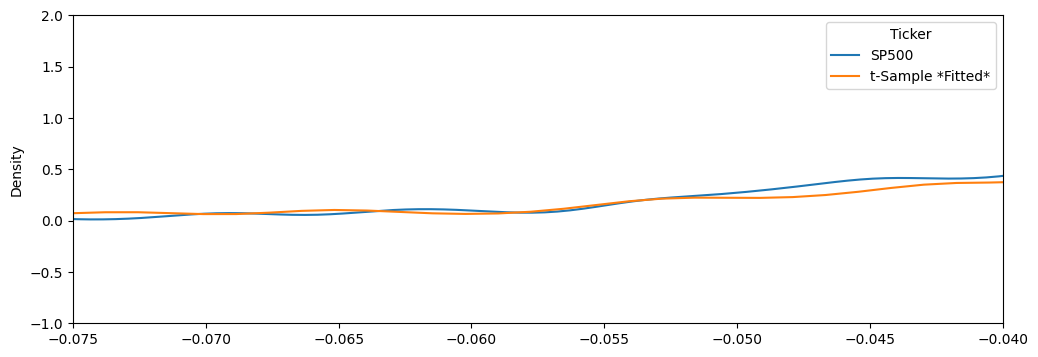

In [27]:
# Plot left tail area
df[['SP500', 't-Sample *Fitted*']].plot(kind = 'kde', figsize = (12,4), xlim = (-0.075, -0.04), ylim = (-1, 2));

This time, the tails seem to be better explained by the t-distribution. Here, we can observe that the fitted t-distribution captures the fat tail of the S&P 500 returns more accurately than the normal distribution. This further demonstrates the suitability of the t-distribution for modeling financial data that exhibits fat tails and the potential for extreme events.

## **8. Conclusion**

This lesson covered surface-level returns and volatility metrics to compare stocks. We also discussed downside risk measures and ways to jointly compare different financial assets. Then, we delved into more advanced metrics modeled with different statistical distributions. We focused for the first time on comparing daily stock return data to normal distributions. We also touched on other potential distributions we could use to model this data.

**References**

- D'Agostino, Ralph B. "An Omnibus Test of Normality for Moderate and Large Size Samples." *Biometrika*, vol. 58, no. 2, 1971, pp. 341–348, https://doi.org/10.1093/biomet/58.2.341.

---
Copyright 2024 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
